# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model .



In [0]:
#!pip install seaborn --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Import the dataset
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head() 

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# Get rid of irrelevant columns
df2 = df.drop(columns=['id','date'])
df2['PPSF'] = df2.price / (df2.sqft_living)

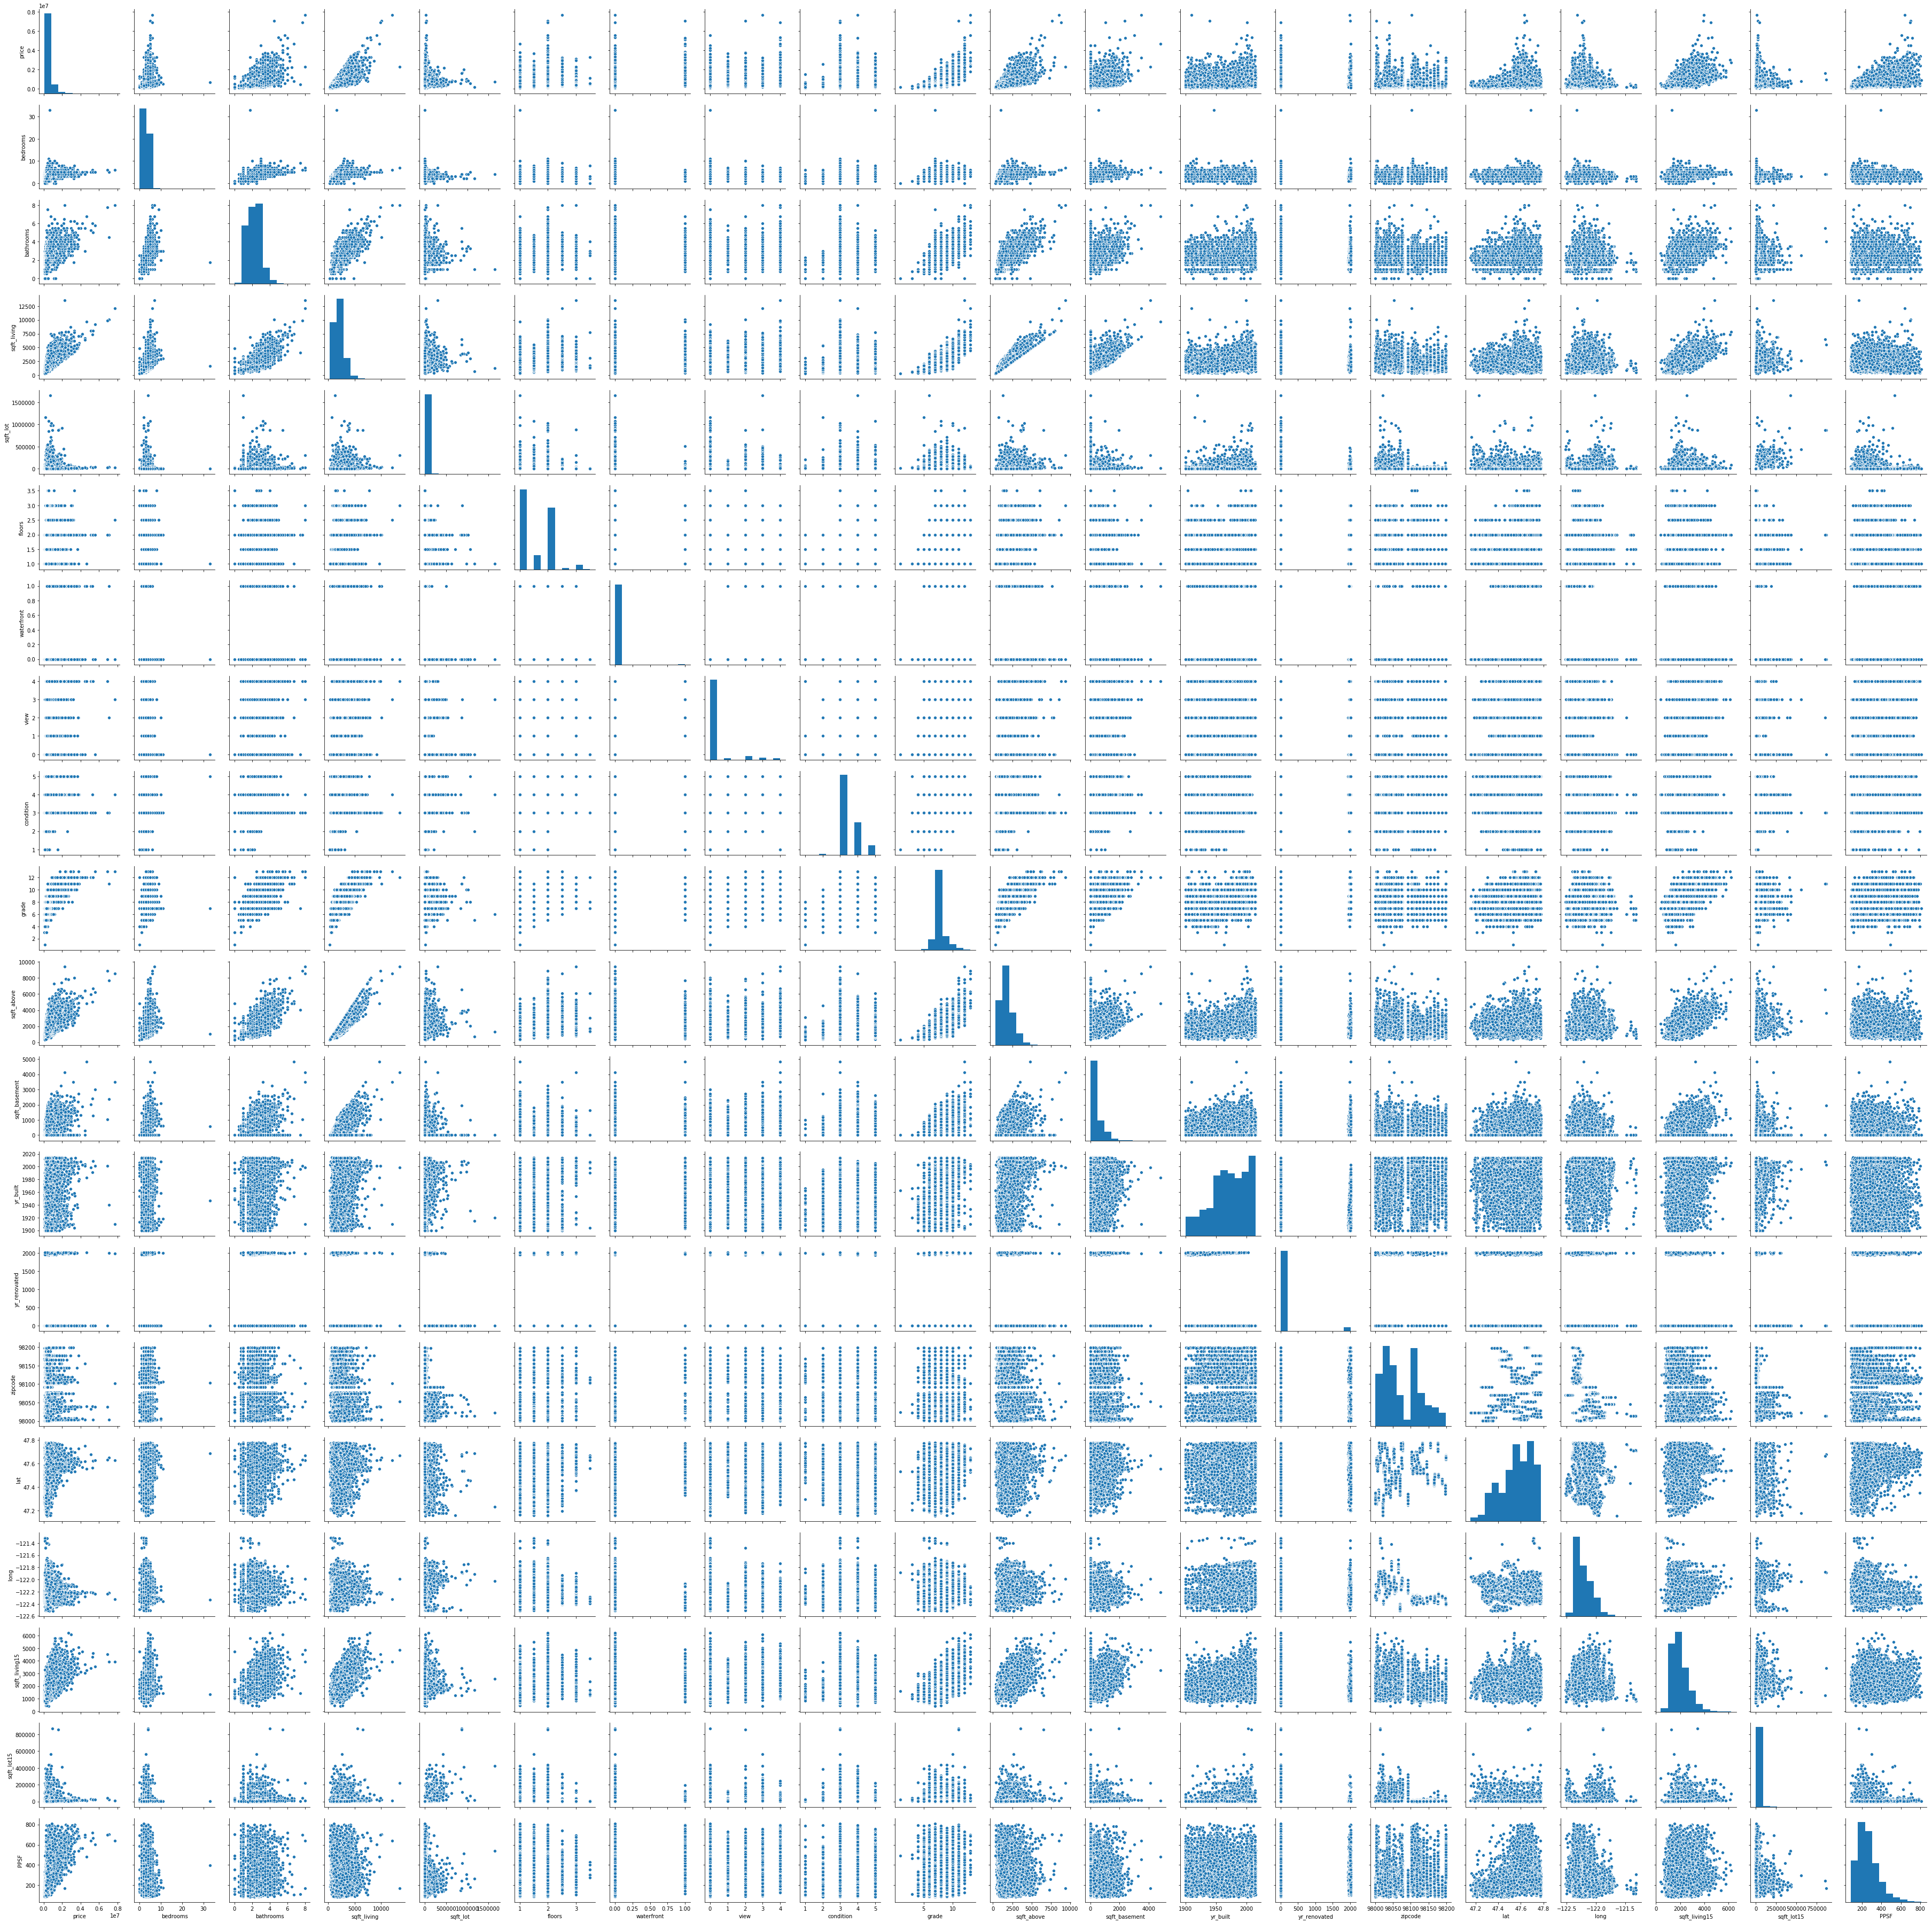

In [5]:
# Explore it real quick after dropping date & id. 
g = sns.pairplot(df2)

In [46]:
# Select the x-value and y-values.
# The pairplot looks to show the most positive corrilation between sqft and price, but # of As and price also looks interesting. 
y = df['price']
A = "sqft_living"
B = "sqft_living15"
x = df[[A, B]]

#Inspect the heads.
print (y.head(4))
print (x.head(4))

0    221900.0
1    538000.0
2    180000.0
3    604000.0
Name: price, dtype: float64
   sqft_living  sqft_living15
0         1180           1340
1         2570           1690
2          770           2720
3         1960           1360


In [47]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.5, random_state=42)
X_train[[A]].shape

(10806, 1)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define my models
model_bivariate_A = LinearRegression()
model_bivariate_B = LinearRegression()

# Fit each column of data to the model. 
model_bivariate_A.fit(X_train[[A]], Y_train)
model_bivariate_B.fit(X_train[[B]], Y_train)

print(f"{A} Coefficient: {model_bivariate_A.coef_}")
print(f"{A} Intercept: {model_bivariate_A.intercept_} \n")

print(f"{B} Coefficient: {model_bivariate_B.coef_}")
print(f"{B} Intercept: {model_bivariate_B.intercept_} \n")

sqft_living Coefficient: [268.42931803]
sqft_living Intercept: -20631.156554487883 

sqft_living15 Coefficient: [297.42534425]
sqft_living15 Intercept: -52895.43355826603 



In [49]:
# Check results and generate predictions from test data. 
A_y_test_predict = model_bivariate_A.predict(X_test[[A]])
B_y_test_predict = model_bivariate_B.predict(X_test[[B]])

# Check the Mean Squared Error for each
A_MSE = mean_squared_error(Y_test, A_y_test_predict)
B_MSE = mean_squared_error(Y_test, B_y_test_predict)

# Check the Root Mean Sqare Error for each 
A_RMSE = (np.sqrt(mean_squared_error(Y_test, A_y_test_predict)))
B_RMSE = (np.sqrt(mean_squared_error(Y_test, B_y_test_predict)))

# Check Rsquared for each
A_R2 = r2_score(Y_test, A_y_test_predict)
B_R2 = r2_score(Y_test, B_y_test_predict)


# Print A stats
print(f"{A} MSE is {B_MSE}")
print(f"{A} RMSE is {A_rMSE}")
print(f"{A} R^2 is {A_r2}")

#Print B stats
print(f"{B} MSE is {B_MSE}")
print(f"{B} RMSE is {B_rMSE}")
print(f"{B} R^2 is {B_r2}")

SyntaxError: ignored

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [0]:
##### Your Code Here #####

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
##### Your Code Here #####

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
